In [17]:
import numpy as np  
import matplotlib.pyplot as plt  
import scipy 
import math  


# finite difference method to calculate the second derivative of a function
def d2f(f, dz, Nz):
    sol = np.zeros((Nz))  # Initialize solution array
    for i in range(1, Nz - 2):
        sol[i] = (f[i - 1] - 2 * f[i] + f[i + 1]) / (dz * dz)
    # Apply boundary conditions at i=0
    sol[0] = (2 * f[0] - 5 * f[1] + 4 * f[2] - f[3]) / (dz * dz)
    # Apply boundary conditions at i=Nz-1
    sol[Nz - 1] = (2 * f[Nz - 1] - 5 * f[Nz - 2] + 4 * f[Nz - 3] - f[Nz - 4]) / (dz * dz)
    return sol

def df(f,dz,Nz):
    sol = np.zeros((Nz))
    i=0
    sol[i]=((2*f[i])-(5*f[i+1])+(4*f[i+2])-f[i+3])/(dz*dz)
    i=Nz-1
    sol[i]=((2*f[i])-(5*f[i-1])+(4*f[i-2])-f[i-3])/(dz*dz)
    for i in range(1,Nz-2):
        sol[i]=(f[i-1]+(-2*f[i])+f[i+1])/(dz*dz)
    return sol

def solve2(dfxndt,fxn_t0,Nz,Nt,dt):
    #intials()
    
    
    
    sol=[]

    

    
    for j in range(0, Nt + 1):
        
        
        k1 = dfxndt(fxn_t0,dz,Nz)
        
        
        k2 =dfxndt ( fxn_t0+k1*dt/2,dz,Nz) 
        
        
        k3 = (dfxndt(fxn_t0+k2*dt/2,dz,Nz)) 
        
        
        k4 = (dfxndt(fxn_t0+k3*dt,dz,Nz))
        
        
        fxn_t0 = fxn_t0 + ((dt / 6.0) * (k1 + (2 * k2) + (2 * k3) + k4))
               
        


       
        fxn_t0[0]=Tfn(z0,j*dt)
        
        fxn_t0[Nz-1]=20
        
        
        sol.append(fxn_t0)

    return sol




In [18]:

A=5
T_surface=20
# To=24*3600
To=30
# z=10

C_w=4174
C_s=2104
C_s=1739
C_w=4180
rho_w=1000
rho_s=2650
lamb=2
qf=4*10**(-7)
rho=rho_s


a1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5-(qf*C_w*rho_w/(2*lamb))
b1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5

def Tfn(x,t):
    return (A*np.exp(-a1*x)*np.sin(-b1*x+(2*np.pi*t/To)))+20

In [19]:


def fxn_t0(z):
    return Tfn(z,0)



def dfxndt(fxn_t0,dz,Nz):
    return ((-d2f(fxn_t0,dz,Nz)/10000)+(df(fxn_t0,dz,Nz)/750))




z0 = 0.0  # start of spatial region in z
zf = 1.5  # end of spatial domain in z
t0=0.0
tf = 30 
Nz = 100  # Number of spatial grid points
Nt = 20000  # Number of time steps
dz = (zf - z0) / (Nz - 1)  # Spatial step size
dt = tf / Nt  # Time step size



z = np.linspace(z0, zf, Nz)
tt = np.linspace(t0, tf, Nt+1)


fxn_t0=fxn_t0(z)

fxn_z0=20
fxn_zf=20




time_plot=[0,10,100,10000,10500,11000,11500]


In [20]:
soln=solve2(dfxndt,fxn_t0,Nz,Nt,dt)
   

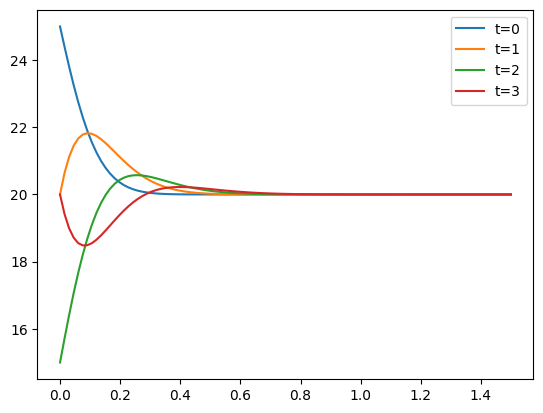

In [21]:

complot=[soln[5000],soln[10000],soln[15000],soln[20000]]
for i in range(len(complot)):
    plt.plot(z,complot[i],label=f't={i}')

# for i in range(len(plotanlyt)):
#     plt.scatter(z,plotanlyt[i],label=f't={i}')

plt.legend()
plt.show() 




In [22]:

To=24*3600


# C_w=4174000
# C_s=2104000
# C_s=1739
# C_w=4180



a1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5-(qf*C_w*rho_w/(2*lamb))
b1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5

def Tfnn(x,t):
    return (A*np.exp(-a1*x)*np.sin(-b1*x+(2*np.pi*t/To)))+20



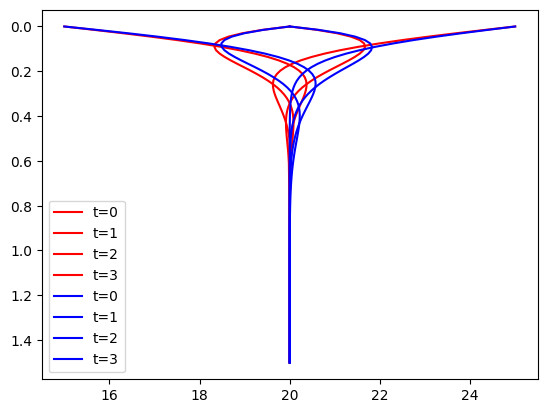

In [26]:
zz=np.linspace(0,1.5,100)

complot=[soln[5000],soln[10000],soln[15000],soln[20000]]

plotanlyt=[Tfnn(zz,(6*3600)),Tfn(zz,(12*3600)),Tfn(zz,(18*3600)),Tfn(zz,(24*3600))]

#plt.figure(8,10)

for i in range(len(plotanlyt)):
    plt.plot(plotanlyt[i],zz,color='Red',label=f't={i}')

for j in range(len(complot)):
    #print(complot[j])
    plt.plot(complot[j],z,color="Blue",label=f't={j}')

# for i in range(len(plotanlyt)):
#     plt.scatter(z,plotanlyt[i],label=f't={i}')
plt.gca().invert_yaxis()
plt.legend()
plt.show() 

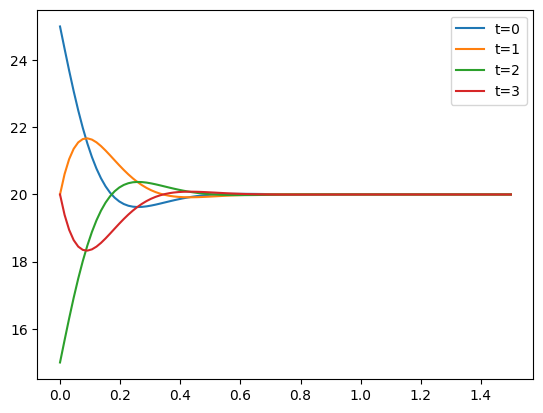

In [24]:
for i in range(len(plotanlyt)):
    plt.plot(zz,plotanlyt[i],label=f't={i}')

# for j in range(len(complot)):
#     #print(complot[j])
#     plt.plot(z,complot[j],color="Blue",label=f't={j}')

# for i in range(len(plotanlyt)):
#     plt.scatter(z,plotanlyt[i],label=f't={i}')

plt.legend()
plt.show() 